**COMPUT MCMD course sping 2019, home work for week 2** 

**By: Samuel Wiqvist** 


#### Introduction 

We will use Monte Carlo methods to analyses steller populations within clusters.

#### Set-up

The first step it to load the packages that we will use for our calculations, and to fix the random numbers (such that we get the same result each time we run our analyses).

In [2]:
using PyPlot # for plotting
using Statistics # for computing statistics 
using Random # for fixing the random numbres used 

Random.seed!(123); # fix random numbers 

Regarding our calculations: In all our calculations we let $M_{\circ} = 1$.

#### The mass distribution for stars

We first plot the distribution (i.e. the power law) for masses in stars.

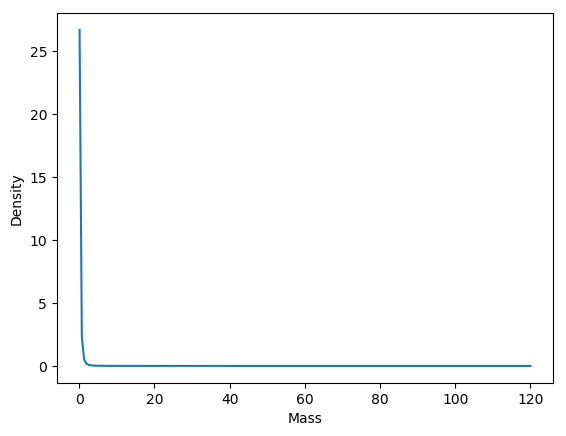

In [3]:
# density function for the mass 
function f(x)

    if x >= 0.08 && x <= 0.5
        γ = 1.3
    elseif x >= 0.5 && x <= 1
        γ = 2.2
    else
        γ = 2.7
    end

    return x^(-γ)

end

# compute desity  
x = LinRange(0.08,120, 200)
density = zeros(length(x))
for i in 1:length(x); density[i] = f(x[i]); end

# plot desity function
PyPlot.figure()
PyPlot.plot(x, density)
PyPlot.xlabel("Mass")
PyPlot.ylabel("Density");

#### Sampling stars with masses according to the density function

To sample stars with masses according to the density function that we have been given we use the hit-and-miss method. This hit-and-miss method is quite inefficient in this case, and for instance, using an importance distribution would probably make our calculations more efficient. 

In [4]:
# hit-and-miss method to sample stars with masses accoring to the density function f
function hitandmiss(N_stars)

    y_max = round(f(0.08)) 

    N_acc = 0

    stars = zeros(N_stars)

    for i = 1:N_stars

        generate = true

        while generate
            x_star = 0.08+(120-0.08)*rand()
            y_star = y_max*rand()

            if y_star <= f(x_star)
                generate = false
                stars[i] = x_star
            end

        end

    end

    return stars

end;


#### The probability for a supernova

If the cluster contains stars with masses larger than $8 M_{\circ}$, then these stars will explode as a supernovae. We will now compute the probability that a cluster with $N_{\star}=100, 300,1000$ stars contains at least one supernova, i.e. at least on star with mass larger than $8 M_{\circ}$.

We now compute the probabilities by sampling clusters with $N_{\star}=100,300,1000$ stars using the hit-and-miss method and then estimating the probability that we have stars in the cluster with masses larger than $8 M_{\circ}$.

In [5]:
# set number of starts to generate
N_stars = [100,300,1000]
prob_supernova = zeros(length(N_stars))

# genreate clusters and compute probabilities 
for i in 1:length(N_stars)
    prob_supernova[i] = length(findall(x -> x > 8, hitandmiss(N_stars[i])))/N_stars[i]
end

# print computed prob for a supernovae
print(prob_supernova)

[0.01, 0.00333333, 0.005]

We obtain following probabilities for stars with masses larger than $8 M_{\circ}$:

$P(\text{at least on star with mass} > M_{\circ})_{N_{\star}=100} = 0.01$

$P(\text{at least on star with mass} > M_{\circ})_{N_{\star}=300} = 0.0033$

$P(\text{at least on star with mass} > M_{\circ})_{N_{\star}=1000} = 0.005$

The next task is to compute the probability for stars with masses larger than $8 M_{\circ}$ in clusters with $50 \leq N_{\star} \leq 1000$ number of stars.

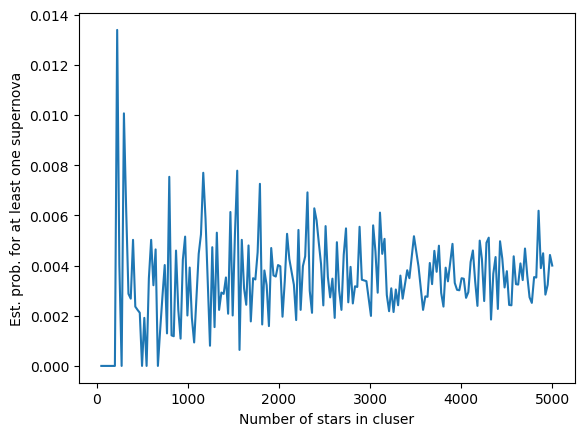

In [6]:
# set number of starts to generate
N_stars = floor.(Int,LinRange(50,5000,200))
prob_supernova = zeros(length(N_stars))

# genreate clusters and compute probabilities 
for i in 1:length(N_stars)
    prob_supernova[i] = length(findall(x -> x > 8, hitandmiss(N_stars[i])))/N_stars[i]
end

# plot prob supernova
PyPlot.figure()
PyPlot.plot(N_stars, prob_supernova)
PyPlot.xlabel("Number of stars in cluser")
PyPlot.ylabel("Est. prob. for at least one supernova");


We can now conclude that the probability for at least one supernova is low if the cluster contains few stars ($N_{\star} < 1000$) and that the probability for at least on supernova converges to approximately $0.004$. 

The next task is to compute the mean, median and lower quantile (the Q1 quantile) expected number of supernovae for a cluster with $N_{\star} = 5000$ stars. For this task we generate 100 clusters with $N_{\star} = 5000$ stars and compute statistics for the population of clusters.

In [40]:
# set number of starts and number of clusters to generate
N_clusters = 100
N_stars = 5000
prob_supernova = zeros(N_clusters)

# genreate clusters and compute probabilities 
for i in 1:N_clusters
    prob_supernova[i] = length(findall(x -> x > 8, hitandmiss(N_stars)))/N_stars
end

# print statistics for the population of clusters 
println(mean(prob_supernova))
println(median(prob_supernova))
println(quantile(prob_supernova, 0.25))


0.003648
0.0036
0.0032


We obtain following statistics:

$\text{mean}(P(\text{at least on star with mass} > M_{\circ})_{N_{\star}=5000}) = 0.0036$

$\text{median}(P(\text{at least on star with mass} > M_{\circ})_{N_{\star}=5000}) = 0.0036$

$Q1(P(\text{at least on star with mass} > M_{\circ})_{N_{\star}=5000})) = 0.032$

We conclude that the average probability for at least one supernova in a cluster with $N_{\star} = 5000$ stars is $0.0036$, which is in line with results we obtained earlier.

#### Number of stars in a cluster with a supernova with $M_{\text{sn}} \geq 25 M_{\circ}$

We are now interested in investigating how many stars there are in a cluster such that the cluster contains a supernova with mass $M_{\text{sn}} \geq 25 M_{\circ}$. This question is of particular interest since our own sum is believed to have formed in such a cluster. 

To investigate this we compaute the probability for having a supernova with $M_{\text{sn}} \geq 25 M_{\circ}$ in clusters with different number of stars $N_{\star}$. 

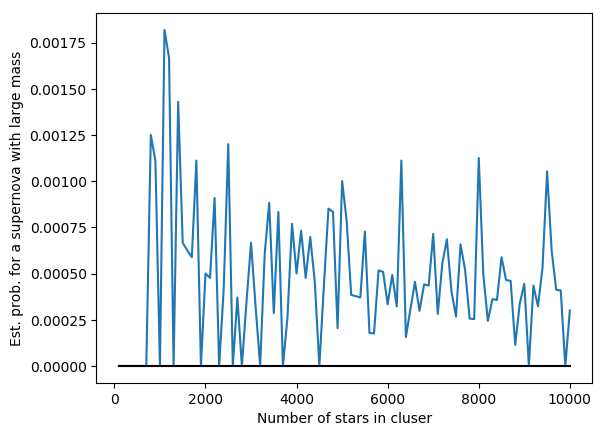

PyObject Text(24,0.5,'Est. prob. for a supernova with large mass')

In [41]:
# set number of starts to generate
N_stars = floor.(Int,LinRange(100,10^4,100))
prob_supernova = zeros(length(N_stars))

# genreate clusters and compute probabilities 
for i in 1:length(N_stars)
    prob_supernova[i] = length(findall(x -> x > 25, hitandmiss(N_stars[i])))/N_stars[i]
end

# plot prob for supernova
PyPlot.figure()
PyPlot.plot(N_stars, prob_supernova)
PyPlot.plot(N_stars, zeros(length(N_stars)), "k")
PyPlot.xlabel("Number of stars in cluser")
PyPlot.ylabel("Est. prob. for a supernova with large mass");


Out simulations show that a cluster that contains a supernova with  $M_{\text{sn}} \geq 25 M_{\circ}$ likely containes more than $N_{\star} = 5000$ stars, since quite many clusters with less than $N_{\star} = 5000$ stars contain no supernova with mass $M_{\text{sn}} \geq 25 M_{\circ}$.